# Linear Regression Model

In [84]:
import numpy as np
import matplotlib.pyplot as plt
import torch

In [85]:
#Building a toy dataset

In [86]:
x_values = [i for i in range(11)]

In [87]:
x_values

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [88]:
#Convert to numpy
x_train = np.array(x_values, dtype=np.float32)
x_train.shape

(11,)

In [89]:
#IMPORTANT: 2D required
x_train=x_train.reshape(-1,1)
x_train.shape

(11, 1)

In [90]:
y_values=[ 2 * i + 1 for i in x_values]

In [91]:
y_values

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

In [92]:
y_train = np.array(y_values, dtype=np.float32)
y_train.shape

(11,)

In [93]:
#IMPORTANT: 2D required
y_train = y_train.reshape(-1,1)
y_train.shape

(11, 1)

## Building Model

In [94]:
import torch
import torch.nn as nn
from torch.autograd import Variable

In [95]:
#Create class
class LinearRegressionModel(nn.Module):
    def __init__(self,input_size,output_size):
        super(LinearRegressionModel,self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        out=self.linear(x)
        return out

In [96]:
input_dim = 1
output_dim = 1

model=LinearRegressionModel(input_dim,output_dim)

In [97]:
criterion=nn.MSELoss() #Mean Square Error Loss

In [98]:
learning_rate = 0.1

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [99]:
epochs=100

In [100]:
for epoch in range(epochs):
    epoch += 1
    
    #Convert numpy to torch Variable
    inputs = Variable(torch.from_numpy(x_train))
    labels = Variable(torch.from_numpy(y_train))
    
    #Clear gradients wrt parameters
    optimizer.zero_grad()
    
    #Forward to get outputs
    outputs = model(inputs)
    
    #Calculate Loss
    loss = criterion(outputs, labels)
    
    #Getting gradients wrt parameters
    loss.backward()
    
    #Updating Parameters
    optimizer.step()
    
#     print('epoch {}, loss {}'.format(epoch, loss.data[0]))

In [101]:
#Purely inference
predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
predicted

array([[nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan]], dtype=float32)

In [70]:
y_train

array([[ 1.],
       [ 3.],
       [ 5.],
       [ 7.],
       [ 9.],
       [11.],
       [13.],
       [15.],
       [17.],
       [19.],
       [21.]], dtype=float32)

In [34]:
#Plot Graph

<function matplotlib.pyplot.show(*args, **kw)>

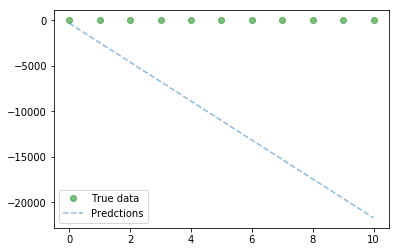

In [73]:
#Clear Figure
plt.clf()

#Get Predictions
predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()

#Plot true data
plt.plot(x_train, y_train, 'go', label= 'True data', alpha=0.5)

#Plot Predictions
plt.plot(x_train, predicted, '--', label='Predctions', alpha=0.5)

#Legend and plot
plt.legend(loc = 'best')
plt.show